In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import random

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
RAVDESS = "/content/drive/My Drive/audio_datasets/ravdess/audio_speech_actors_01-24/"
SAVEE = "/content/drive/My Drive/audio_datasets/savee/ALL/"
CREMA = "/content/drive/My Drive/audio_datasets/cremad/AudioWAV/"

In [ ]:
dir_list = os.listdir(RAVDESS)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    if i == 'audio_speech_actors_01-24':
        break
    fname = os.listdir(RAVDESS + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        #print(part[2])
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVDESS + i + '/' + f)


Ravdess_df = pd.DataFrame(emotion)
Ravdess_df = Ravdess_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
Ravdess_df = pd.concat([pd.DataFrame(gender),Ravdess_df],axis=1)
Ravdess_df.columns = ['gender','emotion']
Ravdess_df['labels'] =Ravdess_df.gender + '_' + Ravdess_df.emotion
Ravdess_df['source'] = 'RAVDESS'
Ravdess_df = pd.concat([Ravdess_df,pd.DataFrame(path, columns = ['path'])],axis=1)
Ravdess_df = Ravdess_df.drop(['gender', 'emotion'], axis=1)
Ravdess_df.labels.value_counts()


male_neutral       144
female_neutral     144
male_angry          96
male_fear           96
male_happy          96
male_sad            96
male_disgust        96
male_surprise       96
female_sad          96
female_angry        96
female_happy        96
female_disgust      96
female_surprise     96
female_fear         96
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(SAVEE)

emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_happy        60
male_fear         60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

In [ ]:
# merge all data frames together
data_path = pd.concat([Ravdess_df, CREMA_df,SAVEE_df], axis = 0)

# save the data frame and make index=False because we will have 4 records for each index
data_path.to_csv("new_data_path.csv",index=False)
print(len(data_path))
data_path.head()

9362


,labels,source,path
0,male_neutral,RAVDESS,/content/drive/My Drive/audio_datasets/ravdess...
1,male_angry,RAVDESS,/content/drive/My Drive/audio_datasets/ravdess...
2,male_neutral,RAVDESS,/content/drive/My Drive/audio_datasets/ravdess...
3,male_neutral,RAVDESS,/content/drive/My Drive/audio_datasets/ravdess...
4,male_fear,RAVDESS,/content/drive/My Drive/audio_datasets/ravdess...


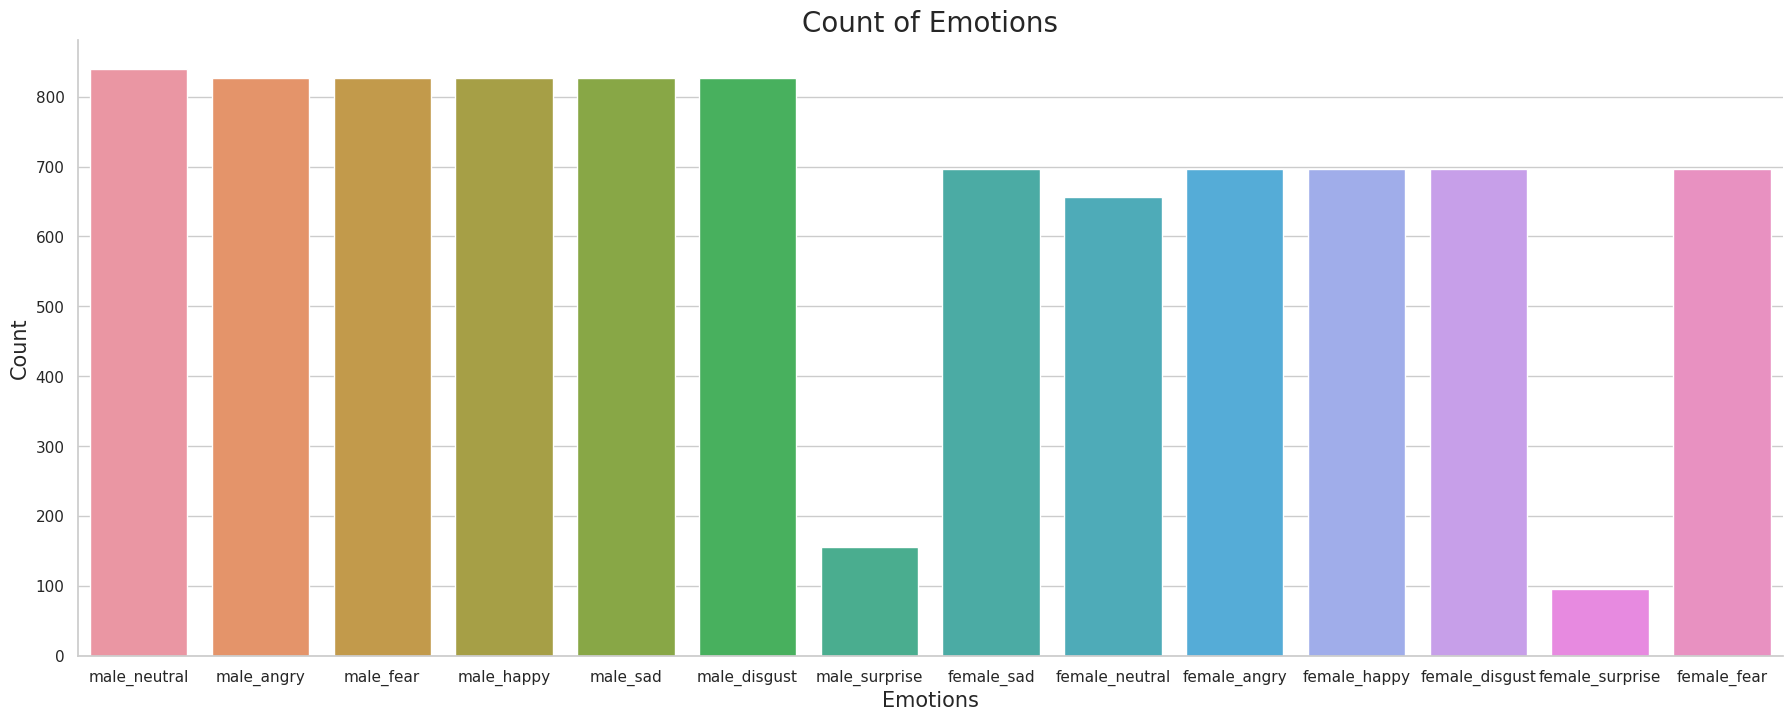

In [ ]:
plt.figure(figsize=(22,8))
sns.countplot(x=data_path.labels)
plt.ylabel('Count', size=15)
plt.xlabel('Emotions', size=15)
plt.title('Count of Emotions', size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data,rate=speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data,rate=speed_factor)

In [ ]:
#sample_rate = 22050

def extract_features(data):

    result = np.array([])

    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5)

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [ ]:
from tqdm import tqdm

X, Y = [], []

# Create a tqdm progress bar for iterating through audio files
for path, emotion in tqdm(zip(data_path.path, data_path.labels), total=len(data_path.path), desc="Processing"):
    features = get_features(path)
    for feature in features:
        X.append(feature)
        # Appending emotion 5 times as we have made 5 augmentation techniques on each audio file.
        Y.append(emotion)


Processing: 100%|██████████| 9362/9362 [43:00<00:00,  3.63it/s]


In [ ]:
len(X), len(Y), data_path.path.shape

(65534, 65534, (9362,))

In [ ]:
import numpy as np

# Assuming you have X and y defined as described in your question

# Save X and y as .npy files
np.save('X.npy', X)
np.save('y.npy', Y)


In [ ]:
import numpy as np

# Load the .npy files
X = np.load('X.npy')
Y = np.load('y.npy')

# Now X_loaded and y_loaded contain the data from your saved files


In [ ]:
import pandas as pd
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('New_Features.csv', index=False)
print(len(Features))
Features.head()

65534


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-612.810791,91.130516,3.656361,14.375623,5.684068,6.595280,-7.815526,-7.708072,-12.261246,-7.313224,...,-2.298631,-5.187122,-4.635029,-4.925192,-0.360843,-2.332021,1.263108,0.800137,4.364462,male_neutral
1,-492.449268,44.159305,16.733776,10.770984,3.360668,4.966189,-3.719283,-8.495883,-7.775618,-6.663141,...,-3.147208,-3.194524,-4.124442,-3.417649,-1.231035,-0.513268,1.028722,2.138092,3.880262,male_neutral
2,-639.490662,87.889549,2.544446,14.656651,5.407093,7.370043,-7.896058,-8.766102,-11.985936,-7.981943,...,-2.360963,-4.475719,-4.096375,-4.932886,-0.448122,-2.077958,1.414581,0.989835,4.355011,male_neutral
3,-612.431152,91.325302,3.806699,14.396902,5.753699,6.611190,-7.920141,-7.714049,-12.320427,-7.419405,...,-2.343835,-5.236850,-4.664764,-4.983605,-0.362699,-2.330943,1.257611,0.785943,4.352597,male_neutral
4,-638.437622,88.741089,1.204423,14.650120,3.167556,6.567999,-10.939040,-10.284823,-14.153422,-5.621749,...,-3.500059,-5.753440,-1.561736,0.082272,1.537234,1.367227,4.719670,3.766017,6.057241,male_neutral


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y_res = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_res,test_size = 0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((52427, 58), (52427, 14), (13107, 58), (13107, 14))

In [ ]:
from sklearn.model_selection import train_test_split

# First split: Separate out a test set
x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y_res, test_size=0.2, random_state=42, shuffle=True)

# Second split: Separate the remaining data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True)  # 0.25 x 0.8 = 0.2

# Check the shapes of the datasets
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape


((39320, 58), (39320, 14), (13107, 58), (13107, 14), (13107, 58), (13107, 14))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((52427, 58, 1), (52427, 14), (13107, 58, 1), (13107, 14))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional

from keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(14, activation="softmax"))


model.compile(optimizer = 'RMSprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 58, 512)           3072      
                                                                 
 batch_normalization_24 (Ba  (None, 58, 512)           2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_43 (MaxPooli  (None, 29, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_52 (Conv1D)          (None, 29, 512)           1311232   
                                                                 
 batch_normalization_25 (Ba  (None, 29, 512)           2048      
 tchNormalization)                                               
                                                     

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/50
820/820 [==============================] - 14s 12ms/step - loss: 1.8606 - accuracy: 0.3374 - val_loss: 2.5554 - val_accuracy: 0.2459 - lr: 0.0010
Epoch 2/50
820/820 [==============================] - 10s 12ms/step - loss: 1.5181 - accuracy: 0.4357 - val_loss: 2.0199 - val_accuracy: 0.3533 - lr: 0.0010
Epoch 3/50
820/820 [==============================] - 10s 12ms/step - loss: 1.3730 - accuracy: 0.4854 - val_loss: 1.5133 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 4/50
820/820 [==============================] - 10s 12ms/step - loss: 1.2358 - accuracy: 0.5345 - val_loss: 1.4310 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 5/50
820/820 [==============================] - 10s 13ms/step - loss: 1.1107 - accuracy: 0.5848 - val_loss: 1.2355 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 6/50
820/820 [==============================] - 10s 12ms/step - loss: 0.9800 - accuracy: 0.6365 - val_loss: 1.5367 - val_accuracy: 0.4923 - lr: 0.0010
Epoch 7/50
820/820 [==============================] - 10s 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


410/410 [==============================] - 2s 4ms/step - loss: 0.5894 - accuracy: 0.9022
Test Accuracy: 90.22%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load your data
X = np.load('X.npy')  # Replace with your file path
y = np.load('y.npy')  # Replace with your file path

# Label Encoding for string labels (if necessary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the 1D CNN model with your specified architecture
model = Sequential([
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(128, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding="same"),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(14, activation="softmax")
])

# Compiling the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Reshape input data for the model
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Training the model
# Include model.fit with your desired training parameters


# Training the model with a validation split
history = model.fit(
    X_train_reshaped,
    y_train_one_hot,
    epochs=50,
    batch_size=64,
    validation_split=0.1  # Using 10% of training data for validation
)

# Evaluate the model on the test set
evaluation = model.evaluate(X_test_reshaped, y_test_one_hot)

# Print evaluation results
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 58, 512)           3072      
                                                                 
 batch_normalization_6 (Bat  (None, 58, 512)           2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 29, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 29, 512)           1311232   
                                                                 
 batch_normalization_7 (Bat  (None, 29, 512)           2048      
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Predict the classes for the test set
y_pred = model.predict(X_test_reshaped)

# Convert predictions from one-hot encoded back to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F1-score
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)


410/410 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[ 885   18   11   23    7    0    0   12    5    5    6    0    0    2]
 [  19  879   14   18   16   27    1    4   22   10    6    0    2    0]
 [   6   16  842   15   17   36    2    0    1    6    5    0    3    0]
 [  33   28   27  880   14    1    2    3    1    6    9    0    0    1]
 [   6   29    6   15  766   25    0    1   11    2    2    2    1    0]
 [   1   19   34    6   32  902    2    0   10    3    2    0    8    0]
 [   2    1    0    1    0    0  121    0    0    1    0    0    0    1]
 [   4    4    0    1    3    0    0 1025   35   10   31    4    6    5]
 [   2    4    1    2    1    0    0   13 1049   20   29   12   42    9]
 [   7    7    4    1    5    3    0   17   52  980   48    6   62   12]
 [   2    3    1    4    2    3    0   24   47   24 1007    8   20    9]
 [   1    3    0    5    2    3    0   22   74   28   43  908   74    6]
 [   0    2    1    2    1   10    0    1   42   4

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load your data (replace with the correct file paths)
X = np.load('X.npy')
y = np.load('y.npy')

# If your labels are strings, use Label Encoding to convert them to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Reshape input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train_reshaped, y_train_one_hot, epochs=50, batch_size=64)

# Evaluation
y_pred = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


Epoch 1/50
820/820 [==============================] - 11s 9ms/step - loss: 2.0225 - accuracy: 0.2719
Epoch 2/50
820/820 [==============================] - 7s 9ms/step - loss: 1.7804 - accuracy: 0.3525
Epoch 3/50
820/820 [==============================] - 7s 9ms/step - loss: 1.6906 - accuracy: 0.3856
Epoch 4/50
820/820 [==============================] - 7s 9ms/step - loss: 1.6144 - accuracy: 0.4095
Epoch 5/50
820/820 [==============================] - 7s 9ms/step - loss: 1.5577 - accuracy: 0.4305
Epoch 6/50
820/820 [==============================] - 7s 9ms/step - loss: 1.4942 - accuracy: 0.4566
Epoch 7/50
820/820 [==============================] - 7s 9ms/step - loss: 1.4290 - accuracy: 0.4806
Epoch 8/50
820/820 [==============================] - 7s 9ms/step - loss: 1.3598 - accuracy: 0.5077
Epoch 9/50
820/820 [==============================] - 7s 9ms/step - loss: 1.2990 - accuracy: 0.5279
Epoch 10/50
820/820 [==============================] - 7s 9ms/step - loss: 1.2320 - accuracy: 0.551

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load your data (replace with the correct file paths)
X = np.load('X.npy')
y = np.load('y.npy')

# If your labels are strings, use Label Encoding to convert them to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the Dense Neural Network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train_one_hot, epochs=50, batch_size=64)

# Evaluation
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


Epoch 1/50
820/820 [==============================] - 4s 3ms/step - loss: 1.7908 - accuracy: 0.3418
Epoch 2/50
820/820 [==============================] - 2s 3ms/step - loss: 1.4927 - accuracy: 0.4411
Epoch 3/50
820/820 [==============================] - 2s 3ms/step - loss: 1.3874 - accuracy: 0.4776
Epoch 4/50
820/820 [==============================] - 2s 3ms/step - loss: 1.3163 - accuracy: 0.5034
Epoch 5/50
820/820 [==============================] - 2s 3ms/step - loss: 1.2607 - accuracy: 0.5244
Epoch 6/50
820/820 [==============================] - 3s 3ms/step - loss: 1.2246 - accuracy: 0.5376
Epoch 7/50
820/820 [==============================] - 2s 3ms/step - loss: 1.1822 - accuracy: 0.5549
Epoch 8/50
820/820 [==============================] - 2s 3ms/step - loss: 1.1477 - accuracy: 0.5670
Epoch 9/50
820/820 [==============================] - 3s 3ms/step - loss: 1.1335 - accuracy: 0.5729
Epoch 10/50
820/820 [==============================] - 3s 3ms/step - loss: 1.1052 - accuracy: 0.5831

In [ ]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, UpSampling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
X = np.load('X.npy')
y = np.load('y.npy')

# If labels are strings, convert them to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Reshape data for Conv1D
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the autoencoder
input_shape = X_train.shape[1]
encoding_dim = 128  # Or another number that works well with your dataset

input_layer = Input(shape=(input_shape, 1))
encoded = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(pool_size=2)(encoded)

# Decoder (not used for classification, just for autoencoder training)
decoded = Conv1D(64, kernel_size=3, activation='relu', padding='same')(encoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Encoder model for classification
autoencoder_encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)

# Building the 1D CNN model with your specified architecture
model = Sequential([
    autoencoder_encoder,
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(128, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding="same"),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation="softmax")
])

# Freeze the encoder layers
for layer in autoencoder_encoder.layers:
    layer.trainable = False

# Compile the 1D CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the 1D CNN model
model.fit(X_train_reshaped, y_train_one_hot, epochs=50, batch_size=64)

# Evaluation
y_pred = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


Epoch 1/10
738/738 [==============================] - 4s 4ms/step - loss: 0.6534 - val_loss: 0.6170
Epoch 2/10
738/738 [==============================] - 3s 4ms/step - loss: 0.6012 - val_loss: 0.6096
Epoch 3/10
738/738 [==============================] - 3s 3ms/step - loss: 0.5961 - val_loss: 0.6061
Epoch 4/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5935 - val_loss: 0.6043
Epoch 5/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5920 - val_loss: 0.6032
Epoch 6/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5910 - val_loss: 0.6020
Epoch 7/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5902 - val_loss: 0.6015
Epoch 8/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5896 - val_loss: 0.6011
Epoch 9/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5891 - val_loss: 0.6006
Epoch 10/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5887 - val_loss: 0.6000

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print("Accuracy of our model on test data : ", round(test_accuracy * 100, 2), "%")


410/410 [==============================] - 2s 3ms/step - loss: 0.6332 - accuracy: 0.8805
Accuracy of our model on test data :  88.05 %


In [ ]:
preds = model.predict(X_test_reshaped)

410/410 [==============================] - 1s 3ms/step


In [ ]:
# Manually decode the predictions based on label classes
y_pred = np.argmax(preds, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Manually decode the true labels
y_true_labels = label_encoder.inverse_transform(y_test)

# Create a DataFrame to compare predicted and actual labels
final_df = pd.DataFrame({
    'PredictedLabels': y_pred_labels,
    'ActualLabels': y_true_labels
})

final_df


,PredictedLabels,ActualLabels
0,male_neutral,male_neutral
1,female_sad,female_sad
2,female_happy,female_neutral
3,female_sad,female_sad
4,female_neutral,female_fear
...,...,...
13102,male_angry,male_angry
13103,male_fear,male_fear
13104,male_sad,male_sad
13105,male_fear,male_fear


Accuracy of our model on test data based on emotions:  89.0 %


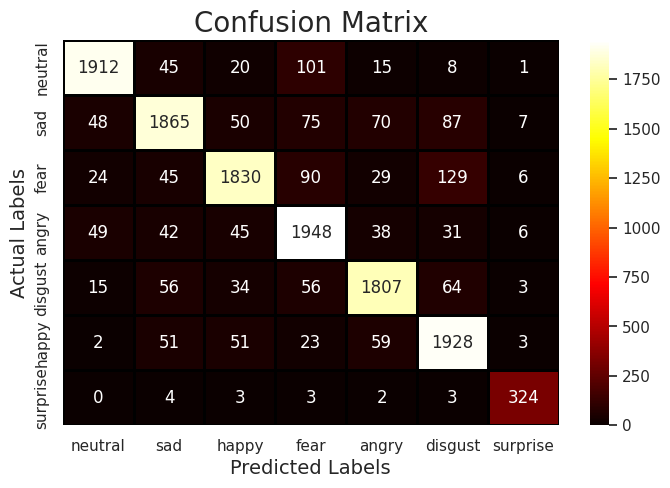

In [ ]:
from sklearn.metrics import accuracy_score
modidf = final_df
modidf['ActualLabels'] = final_df.ActualLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['PredictedLabels'] = final_df.PredictedLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.ActualLabels.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(modidf.ActualLabels, modidf.PredictedLabels)
print("Accuracy of our model on test data based on emotions: " ,round(accuracy_score(modidf.ActualLabels, modidf.PredictedLabels),2)*100,"%")

#cm = confusion_matrix(y_tmp, y_pred)
plt.figure(figsize = (8, 5))
c = pd.DataFrame(c , index = [i for i in modidf['ActualLabels'].unique()] , columns = [i for i in modidf['PredictedLabels'].unique()])
sns.heatmap(c, linecolor='Black', cmap='hot', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(modidf.ActualLabels, modidf.PredictedLabels))

              precision    recall  f1-score   support

       angry       0.93      0.91      0.92      2102
     disgust       0.88      0.85      0.87      2202
        fear       0.90      0.85      0.87      2153
       happy       0.85      0.90      0.87      2159
     neutral       0.89      0.89      0.89      2035
         sad       0.86      0.91      0.88      2117
    surprise       0.93      0.96      0.94       339

    accuracy                           0.89     13107
   macro avg       0.89      0.89      0.89     13107
weighted avg       0.89      0.89      0.89     13107



In [ ]:
final_df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
final_df['PredictedLabels'] = y_pred_labels .flatten()
final_df['ActualLabels'] = y_true_labels .flatten()

final_df

,PredictedLabels,ActualLabels
0,male_neutral,male_neutral
1,female_sad,female_sad
2,female_happy,female_neutral
3,female_sad,female_sad
4,female_neutral,female_fear
...,...,...
13102,male_angry,male_angry
13103,male_fear,male_fear
13104,male_sad,male_sad
13105,male_fear,male_fear


Accuracy of our model on test data based on gender:  99.0 %


Text(66.25, 0.5, 'Actual Labels')

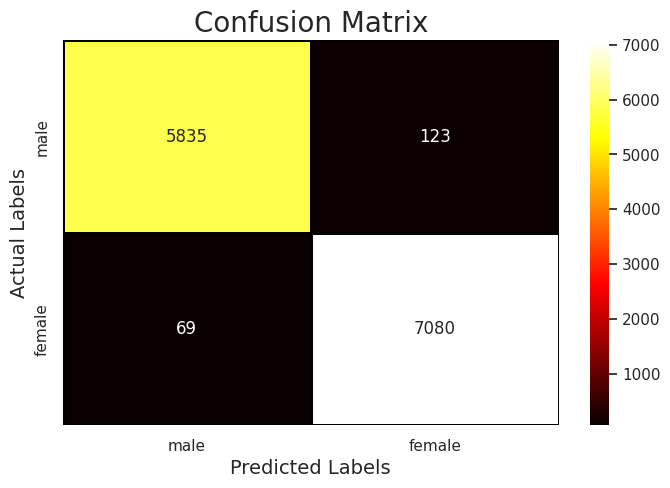

In [ ]:
modidf = final_df
modidf['ActualLabels'] = final_df.ActualLabels.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['PredictedLabels'] = final_df.PredictedLabels.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.ActualLabels.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(modidf.ActualLabels, modidf.PredictedLabels)
print("Accuracy of our model on test data based on gender: " ,round(accuracy_score(modidf.ActualLabels, modidf.PredictedLabels),2)*100,"%")

#cm = confusion_matrix(y_tmp, y_pred)
plt.figure(figsize = (8, 5))
c = pd.DataFrame(c , index = [i for i in modidf['ActualLabels'].unique()] , columns = [i for i in modidf['PredictedLabels'].unique()])
sns.heatmap(c, linecolor='Black', cmap='hot', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

In [ ]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, UpSampling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
X = np.load('X.npy')
y = np.load('y.npy')

# If labels are strings, convert them to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the features separately for training and test data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Reshape data for Conv1D
X_train_reshaped = X_train_normalized.reshape((X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_reshaped = X_test_normalized.reshape((X_test_normalized.shape[0], X_test_normalized.shape[1], 1))

# Define the autoencoder
input_shape = X_train_normalized.shape[1]
encoding_dim = 128  # Or another number that works well with your dataset

input_layer = Input(shape=(input_shape, 1))
encoded = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(pool_size=2)(encoded)

# Decoder (not used for classification, just for autoencoder training)
decoded = Conv1D(64, kernel_size=3, activation='relu', padding='same')(encoded)
decoded = UpSampling1D(2)(decoded)
decoded = Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=10, batch_size=64, validation_split=0.1)

# Encoder model for classification
autoencoder_encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)

# Building the 1D CNN model with your specified architecture
model = Sequential([
    autoencoder_encoder,
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(512, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=5, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(256, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=5, strides=2, padding="same"),
    Conv1D(128, kernel_size=3, strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding="same"),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation="softmax")
])

# Freeze the encoder layers
for layer in autoencoder_encoder.layers:
    layer.trainable = False

# Compile the 1D CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the 1D CNN model
model.fit(X_train_reshaped, y_train_one_hot, epochs=50, batch_size=64)

# Evaluation
y_pred = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


Epoch 1/10
738/738 [==============================] - 4s 4ms/step - loss: 0.6566 - val_loss: 0.6176
Epoch 2/10
738/738 [==============================] - 3s 4ms/step - loss: 0.6020 - val_loss: 0.6106
Epoch 3/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5973 - val_loss: 0.6073
Epoch 4/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5950 - val_loss: 0.6057
Epoch 5/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5935 - val_loss: 0.6044
Epoch 6/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5924 - val_loss: 0.6035
Epoch 7/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5915 - val_loss: 0.6029
Epoch 8/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5907 - val_loss: 0.6021
Epoch 9/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5902 - val_loss: 0.6015
Epoch 10/10
738/738 [==============================] - 3s 4ms/step - loss: 0.5898 - val_loss: 0.6012